In [10]:
#https://www.kaggle.com/code/ehkim9580/spaceship-titanic-eda-ehkim-02212041

import pandas as pd
import missingno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.utils import resample

# Models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
pip install missingno


In [11]:
# Read data
fname = 'spaceship-titanic/train.csv' # .csv 형식의 벡터 파일
df = pd.read_csv(fname)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
# Save to df
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')

# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Text(0.5, 1.0, 'Target distribution')

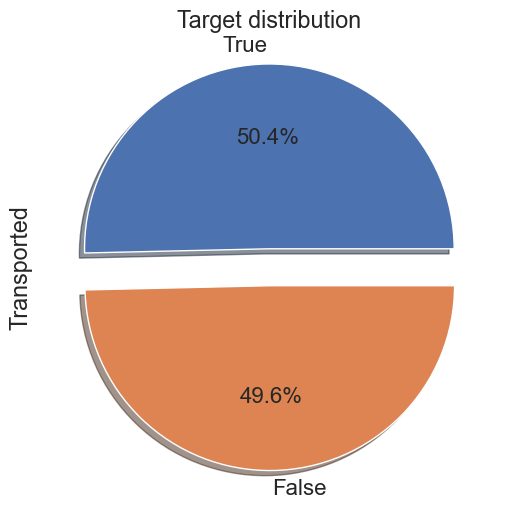

In [13]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

target이 무척 밸런스적절함 - > 고민할 필요 없음

In [14]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

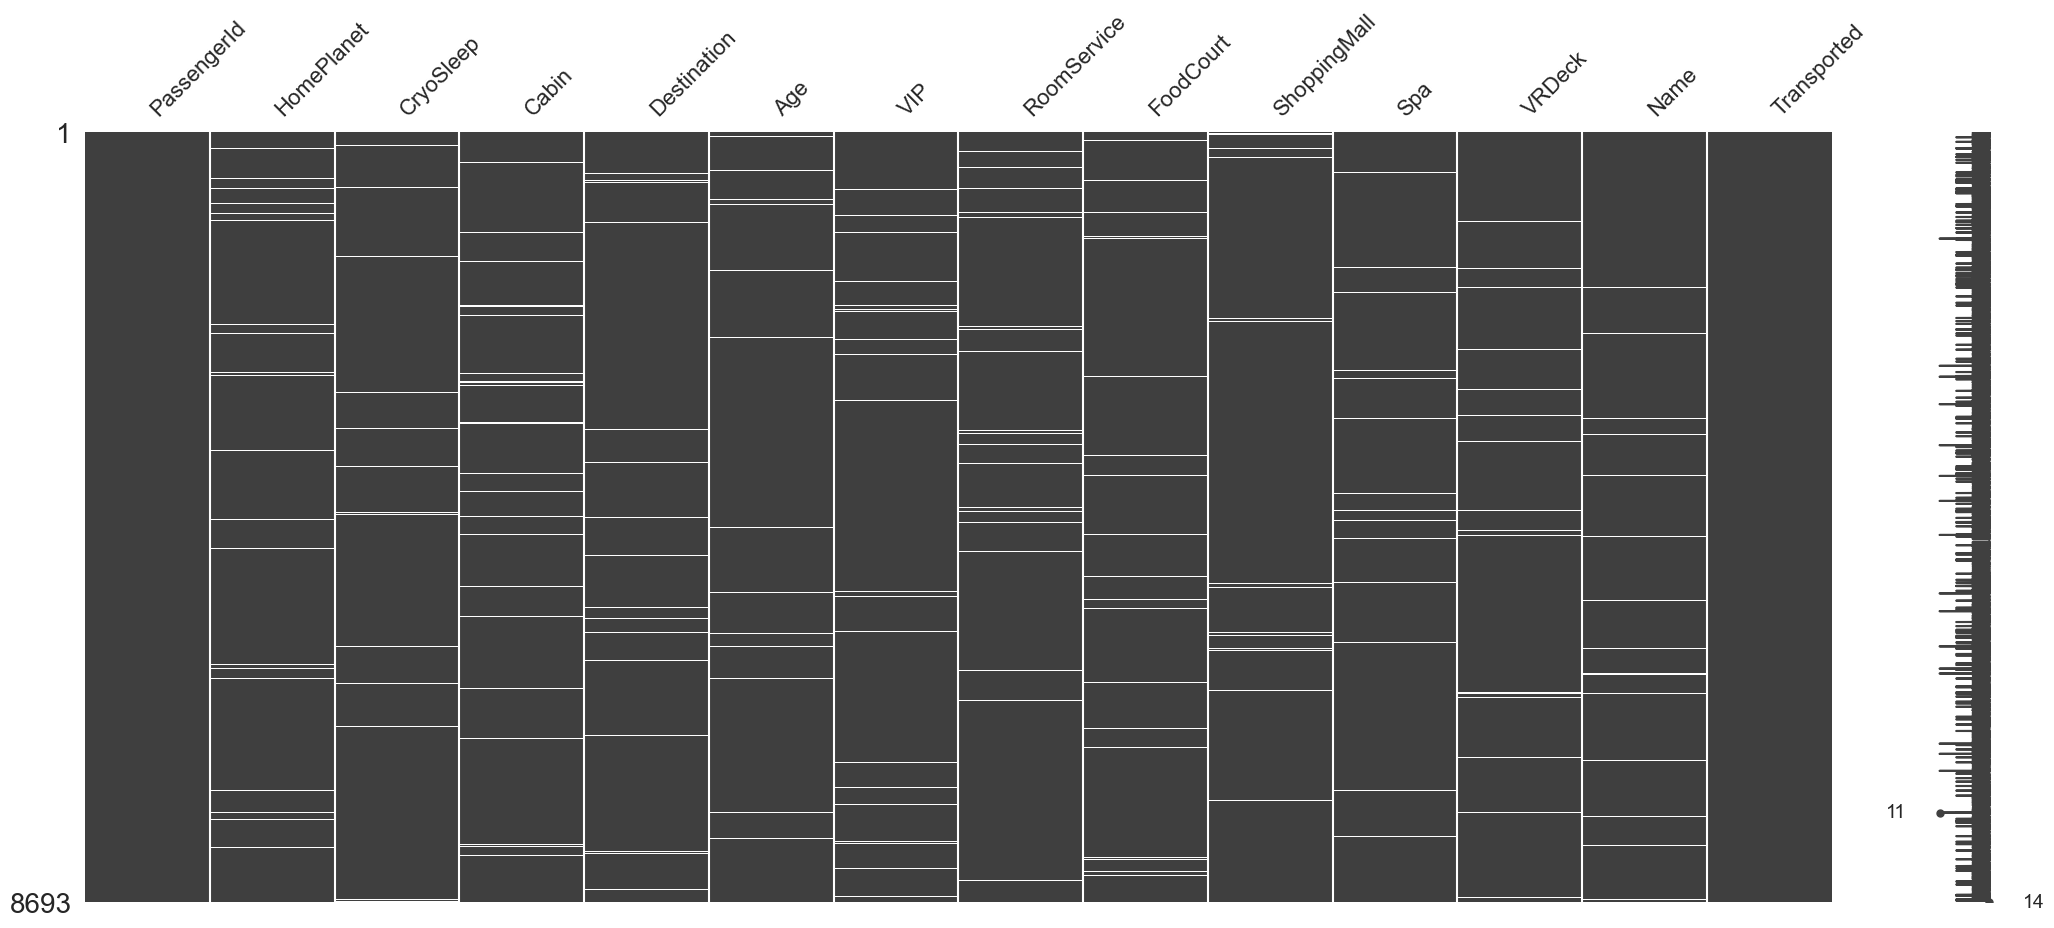

In [15]:
#결측치 확인
missingno.matrix(df)

<AxesSubplot:>

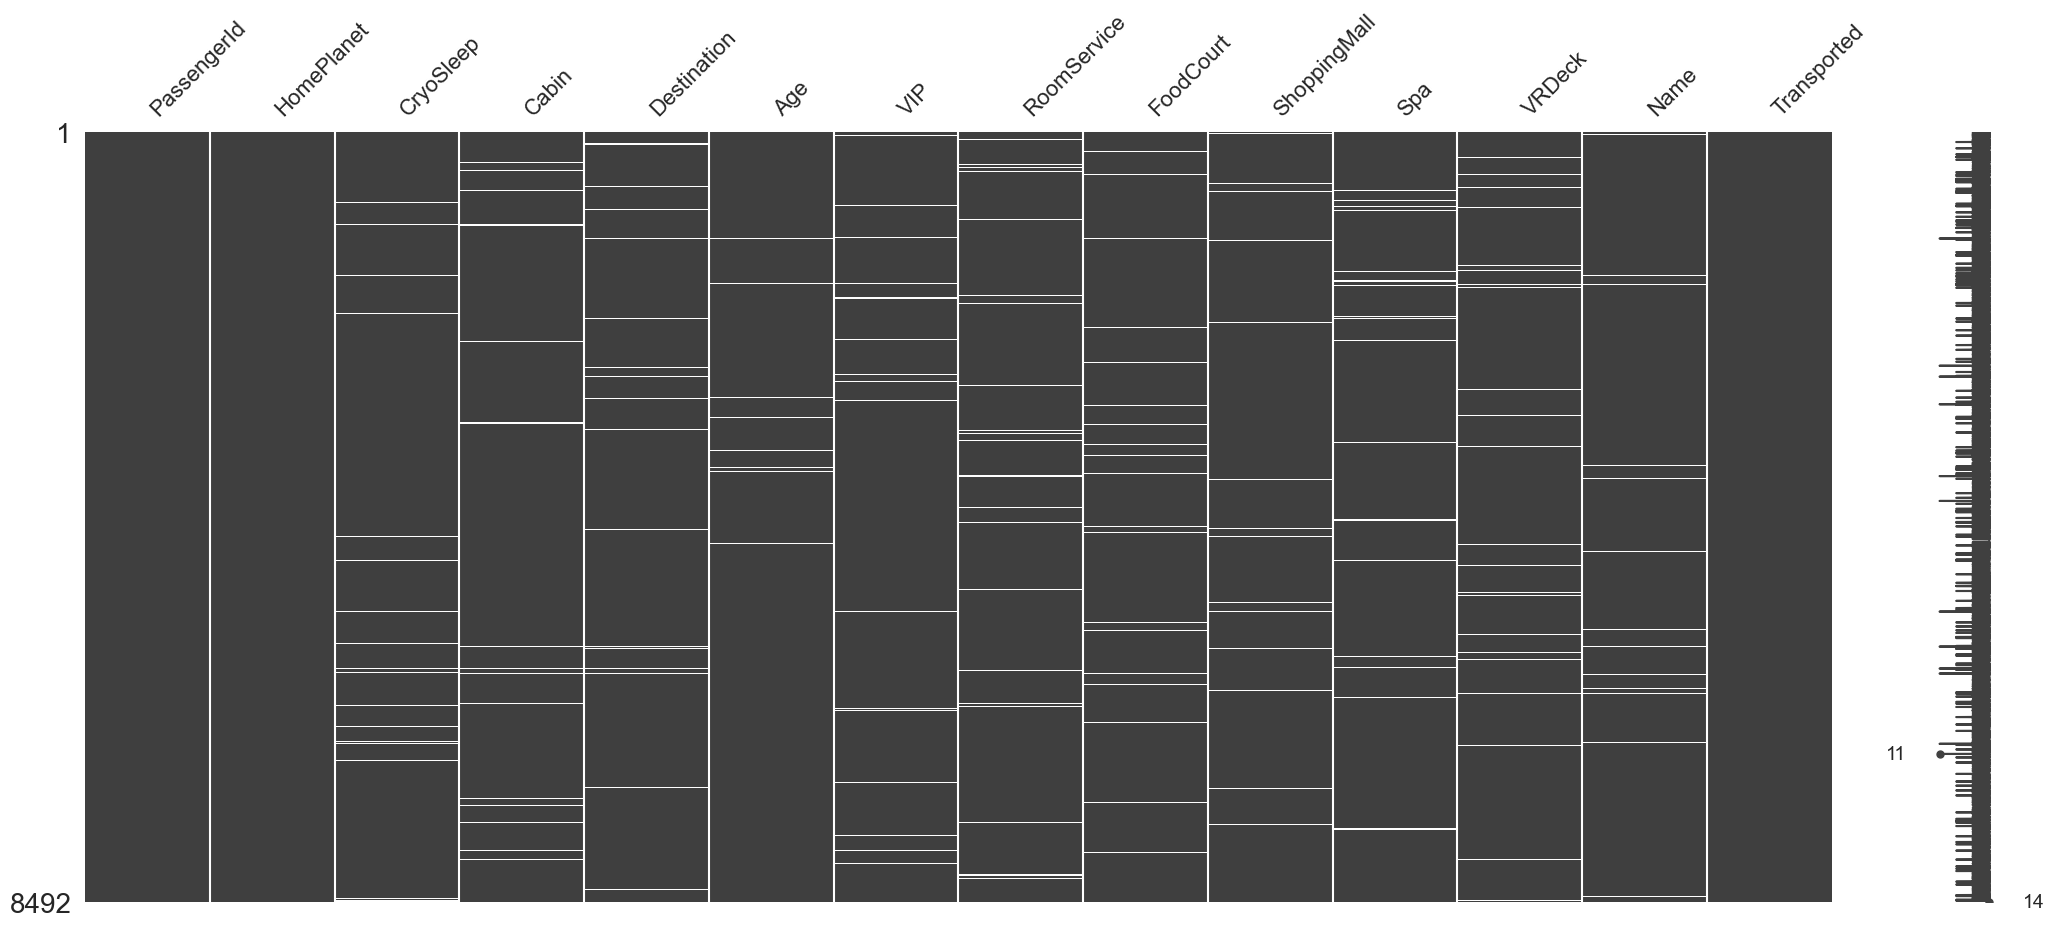

In [20]:
missingno.matrix(df)

03-02. 'CryoSleep' 변수
- 'CryoSleep' True/False로 구분된 논리형(Boolean) 변수임.
- 보간 여부를 확인하기 위해 변수 데이터에 대한 분석을 수행함.¶

In [21]:
df['CryoSleep'].describe() 
#FALSE 가 5315개 TRUE는 2962개

count      8277
unique        2
top       False
freq       5315
Name: CryoSleep, dtype: object

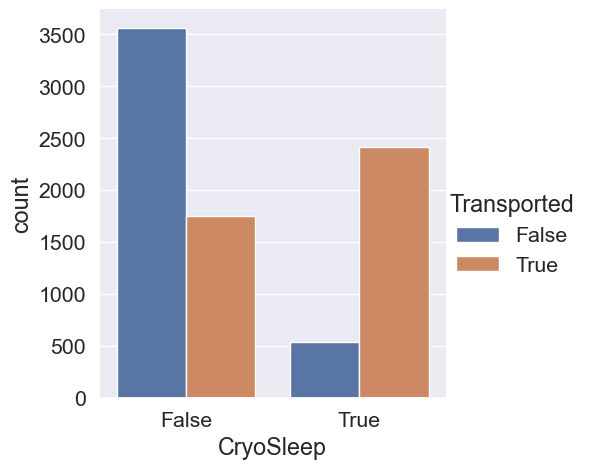

In [22]:
sns.catplot(data=df,x='CryoSleep',hue='Transported',kind='count')

<AxesSubplot:>

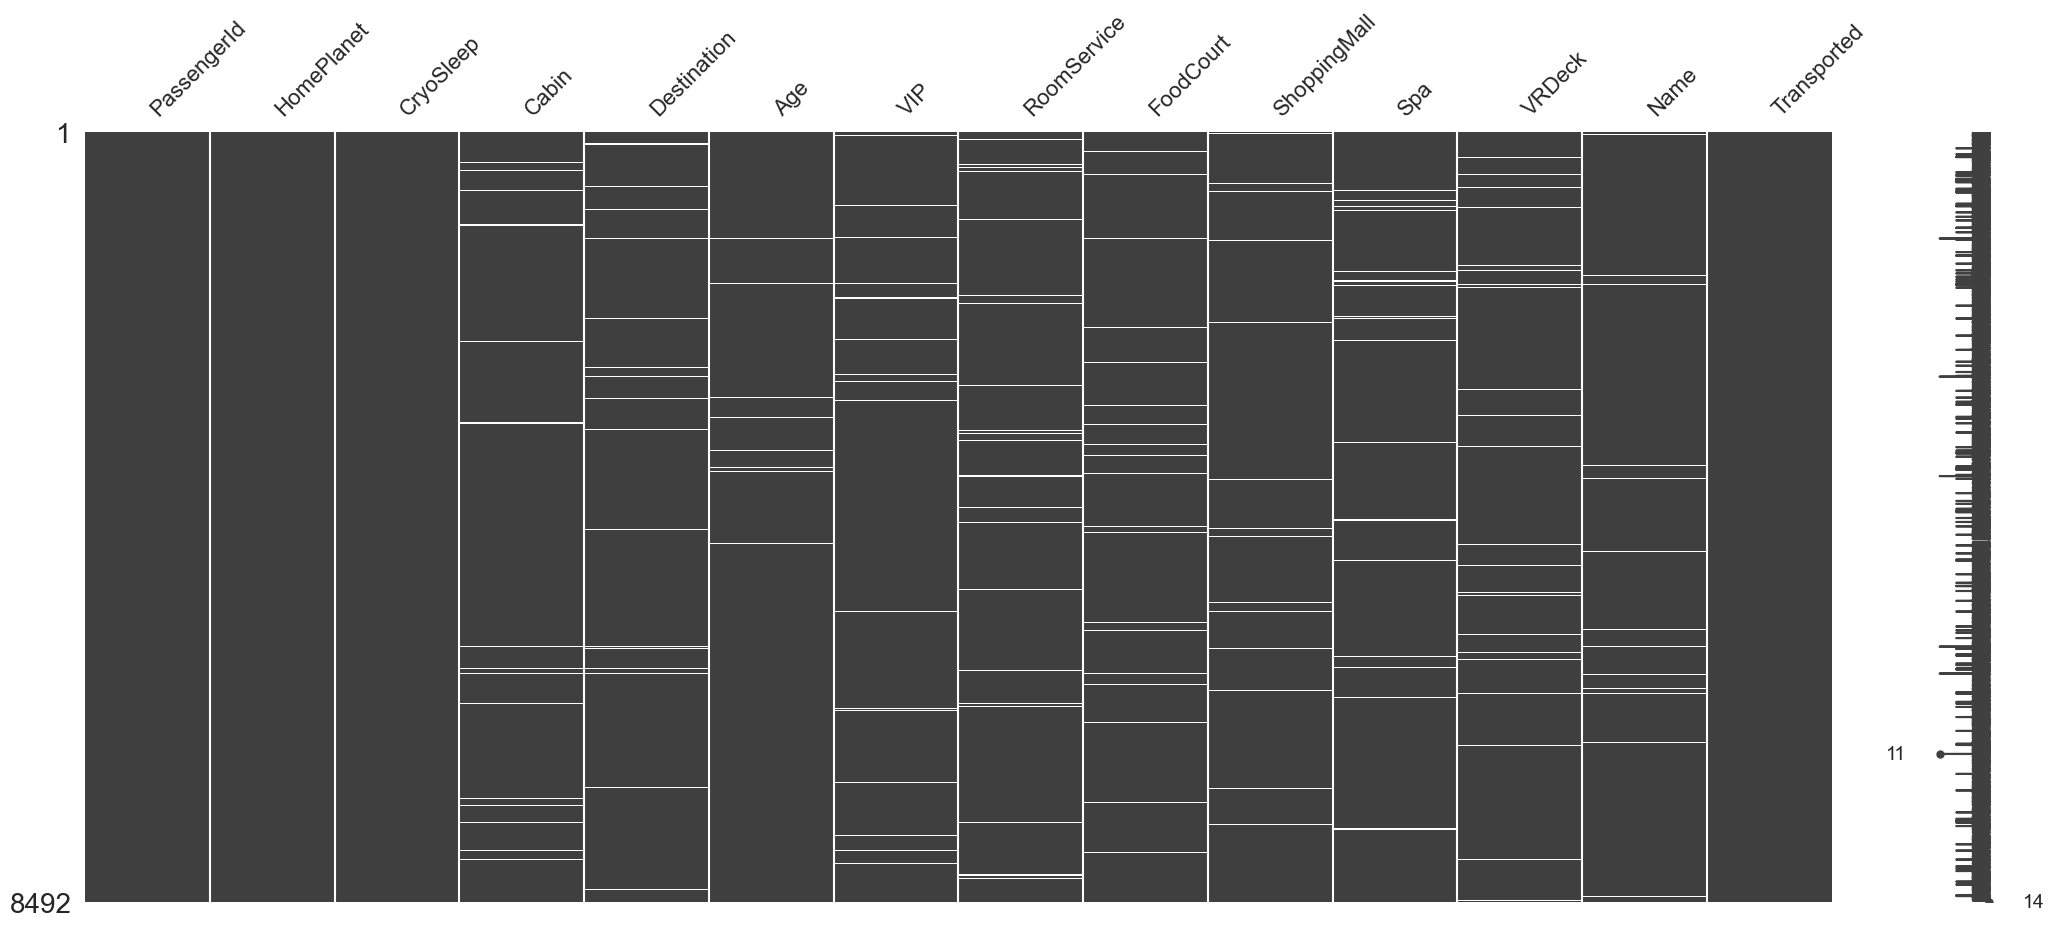

In [23]:
df['CryoSleep'].fillna(False, inplace=True)
missingno.matrix(df)

03-03. 'Cabin' 변수
- 'Cabin' 변수는 탑승 공간에 대한 정보를 갖고 있기에 보간하기 어려움
- 따라서 여기서는 결측값에 대해 제거하였음

In [24]:
df.dropna(subset=['Cabin'],axis=0,inplace=True) #dropna : 결측치 제거 메서드(subset 인자 : 특정 열만을 기준 NaN 값 탐색 제거,axis=0 :행방향으로 제거)
df.reset_index(drop=True,inplace=True) #reset_index()  : 인덱스를 0부터 순서대로 다시 지정
#drop 파라미터를 True로 설정하여, 이전에 있던 인덱스를 삭제함.missingno.matrix(df

<AxesSubplot:>

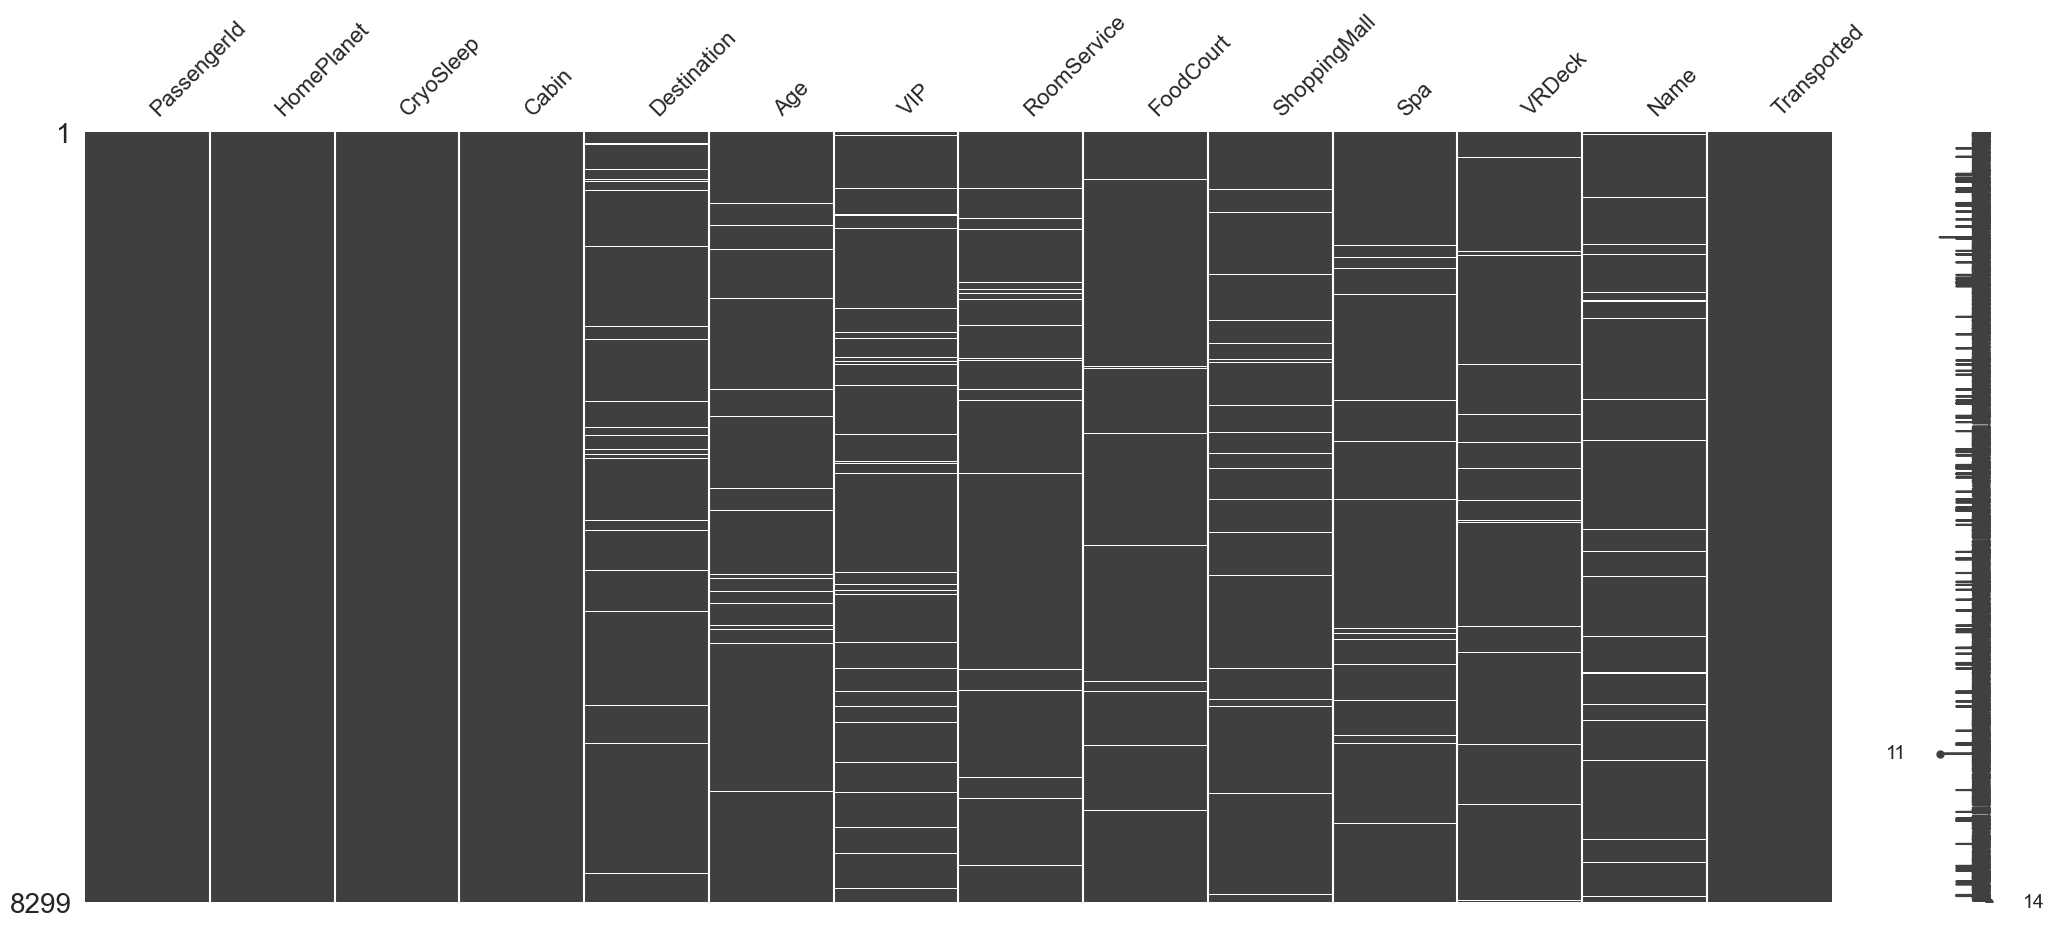

In [25]:
missingno.matrix(df)

03-04. 'Destination' 변수

In [26]:
set(df['Destination'].to_list())

{'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan}

In [27]:
df['Destination'].describe()

count            8125
unique              3
top       TRAPPIST-1e
freq             5642
Name: Destination, dtype: object

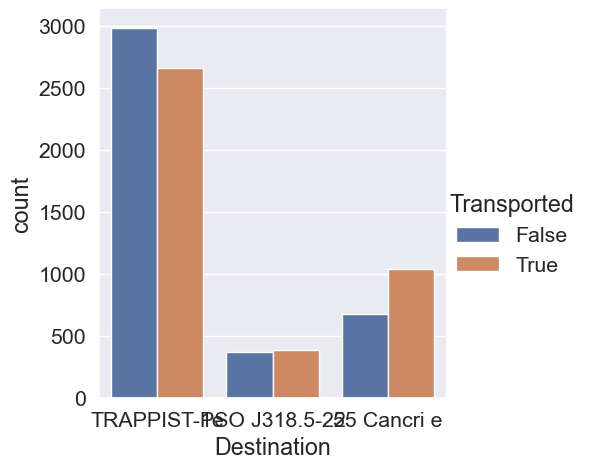

In [28]:
sns.catplot(data=df, x='Destination', hue='Transported', kind='count')

In [29]:
#NaN
print(((len(df['Destination'].loc[df['Destination'].isna()==True]))/len(df))*100) #결측치 비율출력
# TRAPPIST-1e
print((df['Destination'].loc[df['Destination']=='TRAPPIST-1e'].count()/len(df))*100)
# PSO J318.5-22
print((df['Destination'].loc[df['Destination']=='PSO J318.5-22'].count()/len(df))*100)
# 55 Cancri e
print((df['Destination'].loc[df['Destination']=='55 Cancri e'].count()/len(df))*100)

2.0966381491745993
67.98409446921316
9.181829136040488
20.737438245571756


4개 더하면 100

In [30]:
df['Destination'].fillna('TRAPPIST-1e', inplace=True)

03-05. 'Age' 변수
- 'Age' 변수의 경우 연령대별과 'Transported'를 비교하여 보간하고자 함

In [33]:
# New features - dfing set
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>12) & (df['Age']<18),'Age_group']='Age_13-17'
df.loc[(df['Age']>=18) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>25) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

# New features - test set
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')


NameError: name 'test' is not defined

<AxesSubplot:xlabel='Age'>

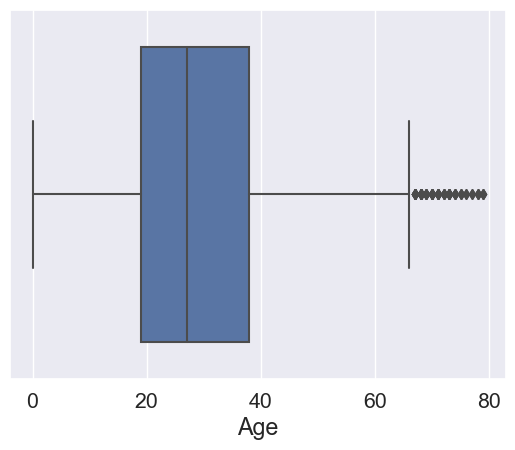

In [32]:
sns.boxplot(data=df,x='Age')

<AxesSubplot:xlabel='Transported', ylabel='Age'>

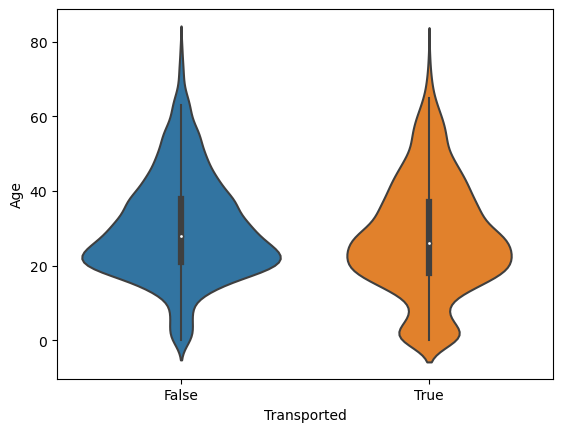

In [22]:
sns.violinplot(data=df, x='Transported', y='Age')
#데이터 분포를 부드러운 곡선으로 나타내며, x축은 데이터 값의 범위를 나타내고 y축은 확률 밀도를 나타냅니다.

In [23]:
df['Age'].describe()

count    8126.000000
mean       28.826975
std        14.497825
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

20대와 30대가 많음.

Transported 변수에 따라 큰 차이가 없이 비슷함

따라서 결측값을 평균 나이로 보간해보자.

<AxesSubplot:>

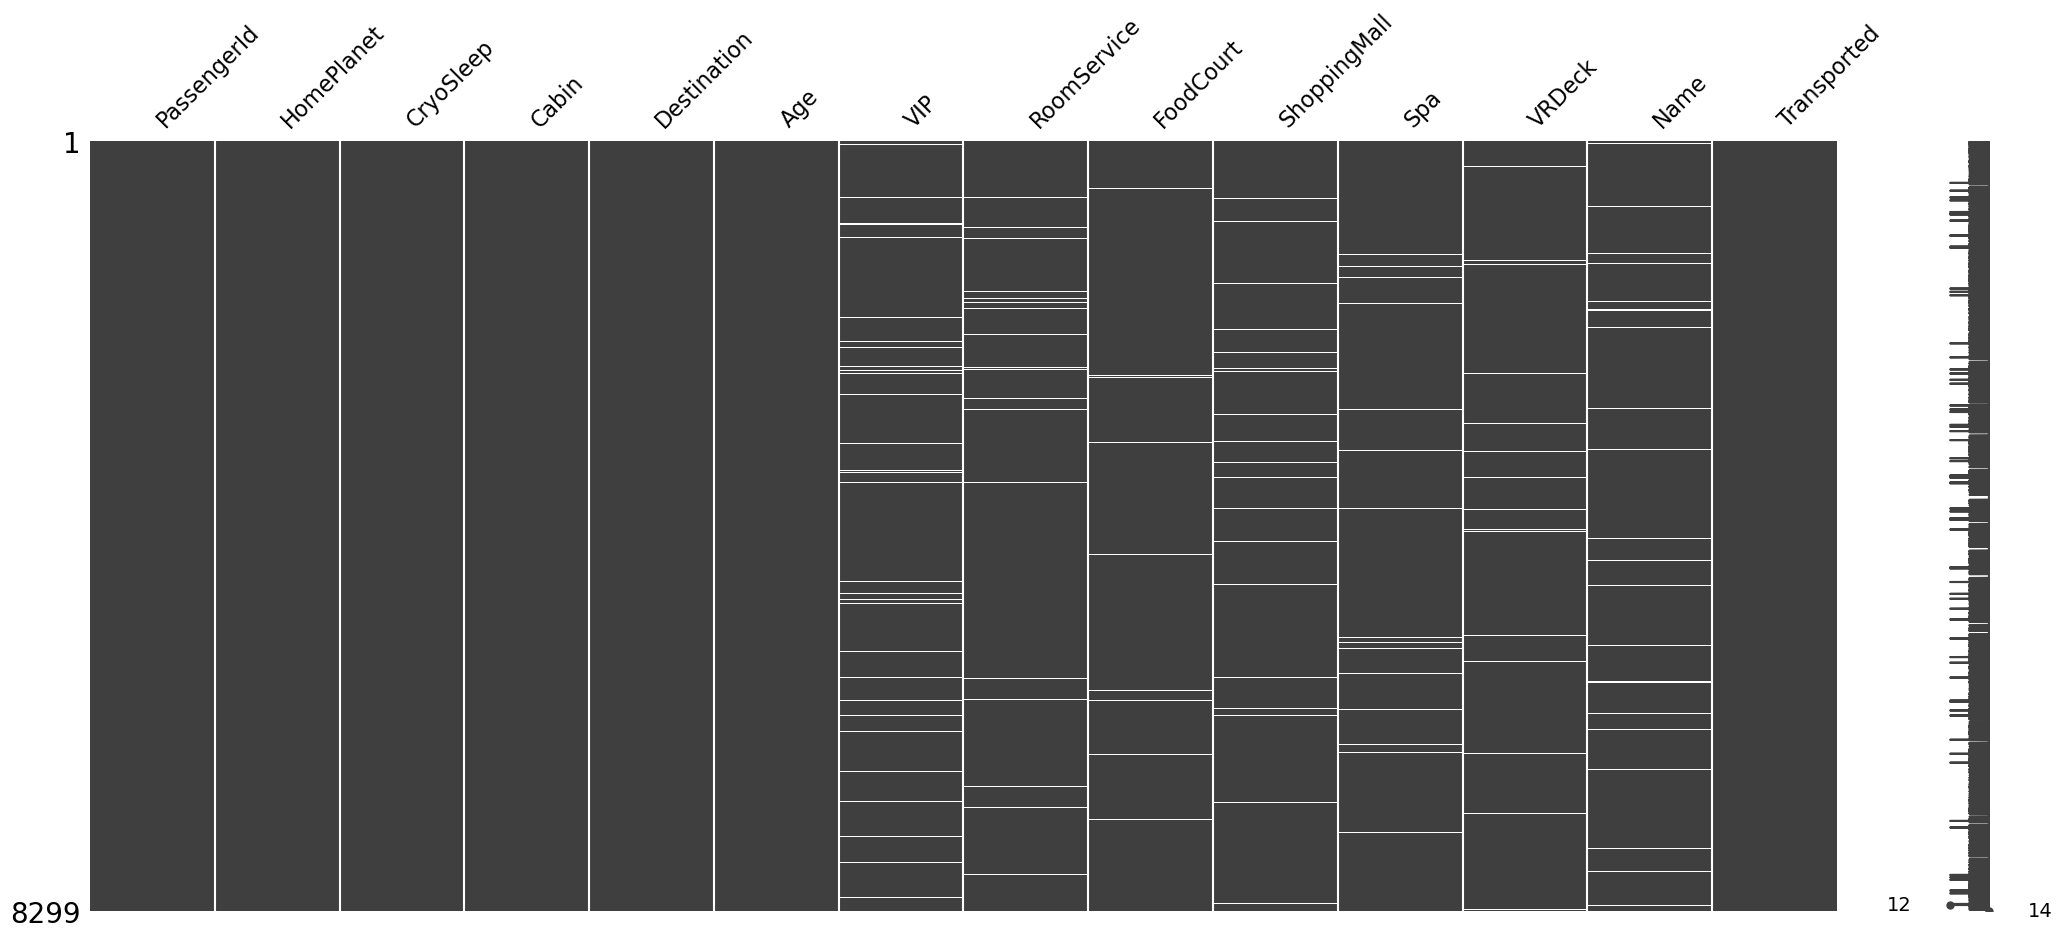

In [24]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
missingno.matrix(df)

03-06. 'VIP' 변수

In [25]:
df['VIP'].describe()

count      8105
unique        2
top       False
freq       7917
Name: VIP, dtype: object

- 'VIP' 변수의 경우 결측값이 194개(2.3%), True 189개(2.3%), False 7916(95.4%)개임
- False가 월등하게 비중이 크기에 이 경우 결측값을 False로 보간하였음.

<AxesSubplot:>

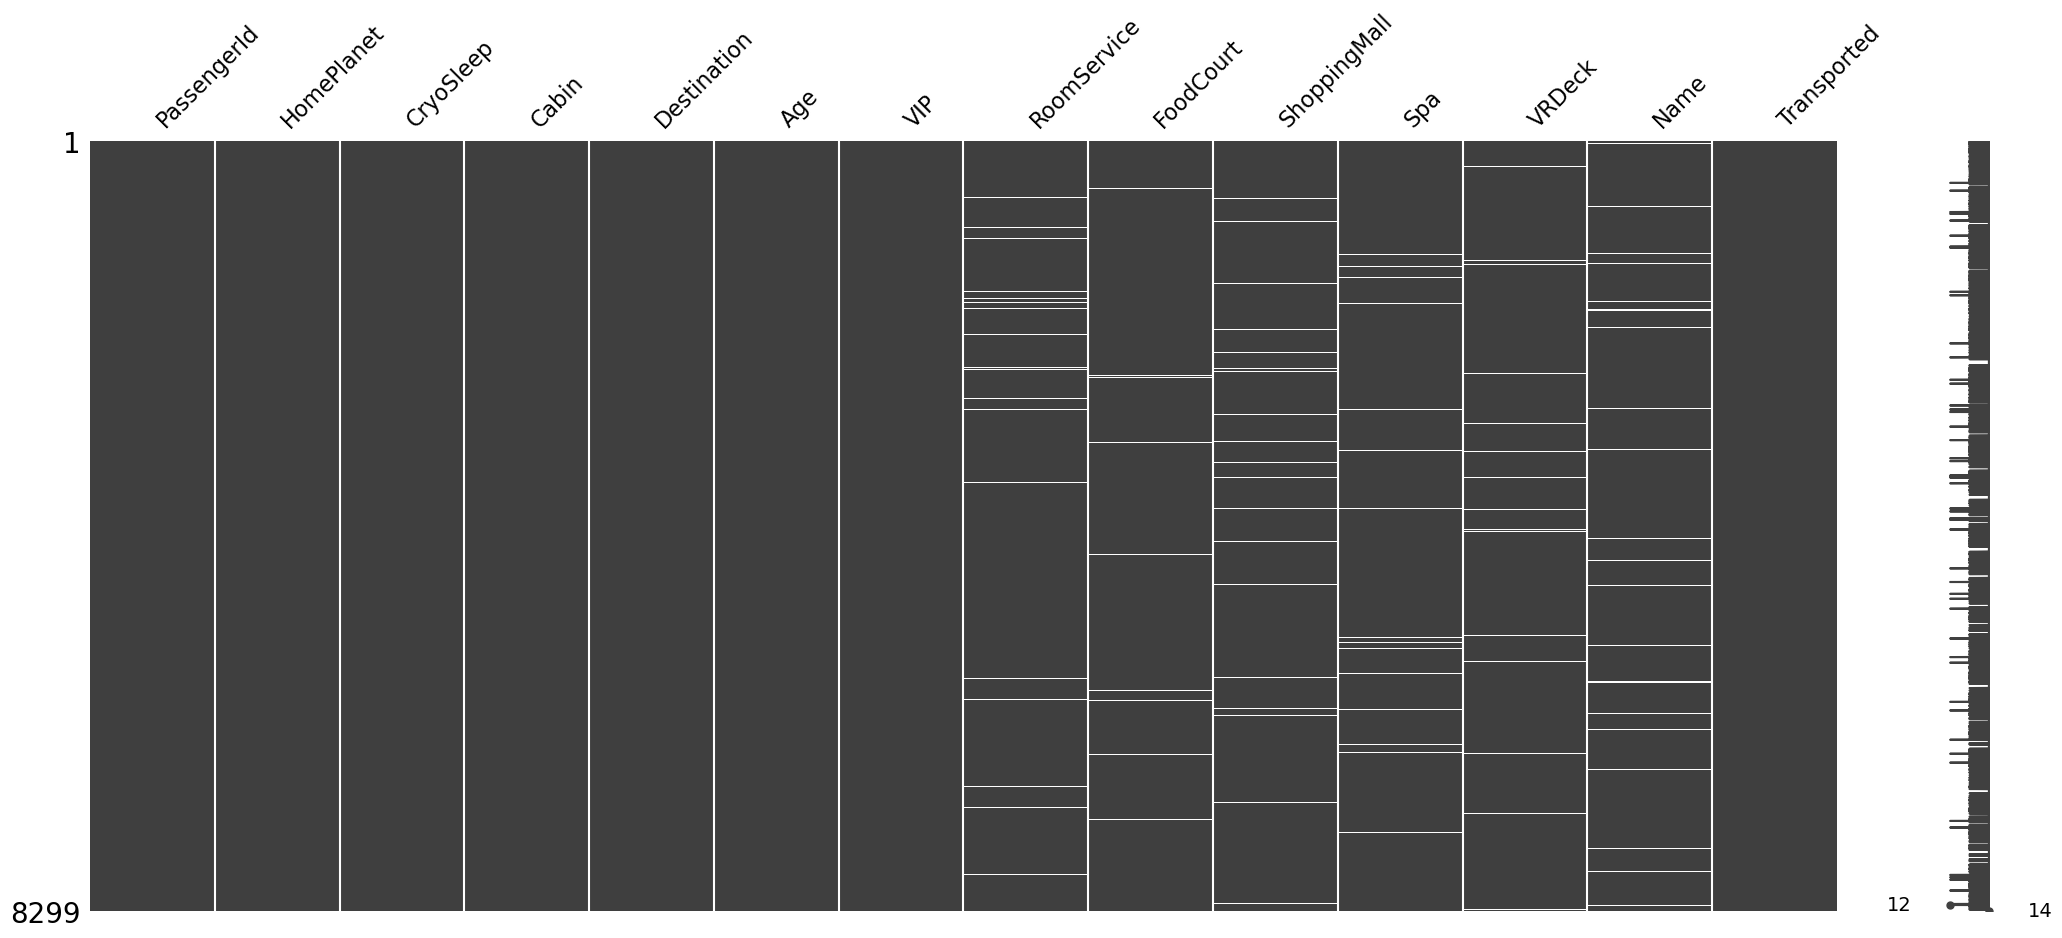

In [26]:
df['VIP'].fillna(value=False, inplace=True)
missingno.matrix(df)

In [27]:
#호화시설은 거의 이용x 따라서 결측값은 0으로 보간
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=float(0))

04. EDA

- 'HomePlanet'의 경우 앞선 결측치 제거 과정에서 Trasported 변수와 비교한 결과 행성마다 차이가 있었으나 행성에 따라 실종여부가 결정될 정도로 유의미한 차이가 있지는 않았음.

- 'CryoSleep'의 경우 True(즉, 냉동수면)일 경우 Transported 변수의 True 값이 월등하게 많았으며, 반대로 CryoSleep이 False일 경우 Transported 변수도 역시 False 값이 월등하게 많았음. 따라서 CryoSleep은 실종여부를 파악하는데 도움이 될 변수로 생각됨.

- 'Destination' 변수의 경우 도착지에 따라 실종여부가 명확하게 나타나지는 않았음.

- 'Age' 변수의 경우 Transported 변수의 두 값 모두 비슷한 양상으로 나타났기에 실종여부와 명확한 관계성을 갖는다고 보기 어려움.

- 'Cabin' 변수의 경우 Deck와 Side로 나누어 확인해도 'Transported' 변수와 명확한 관계성이 보이지 않으나, Deck 구역 중 B와 C 구역에서 실종 비율이 컸음.

In [30]:
cabin 변수의 경우 deck와 side로 나누어 확인해도 'Transported' 변수와 명확한 관계성이 보이지 ㅇ낳으나, deck 구역 중b b와 

SyntaxError: invalid syntax (789810459.py, line 1)